# <u>Direct Digital Synthesis DDS</u>

## <u> Einleitung </u>

## <u> Wie Funktioniert ein DDS? </u>

Ein sogenannter Phasenakkumulator zählt periodisch hoch. Dieser wird digital als Modulo-N-Zähler realisiert. Der Modulo-N-Zähler hat 2^N mögliche Zustände, wobei N die Anzahl der Bits des Zählers ist.
Da das Inkrement der Zählerstufe M beliebig geändert werden kann, wird auch die Frequenz des erzeugten Signals verändert. Ein größeres M bedeutet eine höhere Frequenz des Ausgangssignals.

Der Zählerstand des Phasenakkumulators entspricht auch dem jeweiligen Index der Wellenform in einer vordefinierten Look-Up-Tabelle.

Der zyklisch ermittelte Wert aus der Look-Up-Tabelle wird auf einen D/A-Wandler gesetzt, der ein analoges Signal erzeugt.

## <u> Welches Kriterium ist wichtig, um Digitale-Signale in Analoge-Signale zu wandeln? </u>

Für die D/A-Wandlung ist es wichtig, dass das Shannon-Abtasttheorem eingehalten wird. Dieses Theorem besagt, dass ein Signal mindestens mit der doppelten Frequenz der größten Frequenzkomponente, die im Signal enthalten ist, abgetastet werden muss, um einen Informationsverlust zu vermeiden.

Falls das Shannon-Abtasttheorem nicht eingehalten wird, kann es dazu führen, dass Frequenzen angezeigt werden, die nicht existieren.

## <u> Welche Wortbreite benötigt der Phasenaccumulators für 10Hz-10KHz?

Die DDS soll Signale im Frequenzbereich von 10hz bis 10KHz generieren. Dabei erfolgt die Abtatung mit einer Frequenz von 40KHz. Bei der Erzeugung der 10Hz Frequenz, soll der Phasenaccumulator eine Phasenschrittweite von 1 aufweisen.


$f_0=10Hz$      $f_s=40kHZ$    $\Delta ACC = 1$
___
$N = log_2(\Delta ACC \cdot \frac{f_s}{f_0}) = log_2(1 \cdot \frac{40KHz}{10Hz}) = 12Bit$

**Bestimmung der einzustellenden Phasenschritte um die folgenden Grundfrequenzen zu
erhalten:**

$f_0 = 10Hz \ \ \ f_s = 40KHz \ \ \ N=12$
</br>
</br>
$M = \frac{2^N \cdot f_0}{f_s} = \frac{2^{12} \cdot 10Hz}{40KHz} = 1$
___
$f_1 = 500Hz \ \ \ f_s = 40KHz \ \ \ N=12$
</br>
</br>
$M = \frac{2^N \cdot f_1}{f_s} = \frac{2^{12} \cdot 500Hz}{40KHz} = 51$
___
$f_2 = 941Hz \ \ \ f_s = 40KHz \ \ \ N=12$
</br>
</br>
$M = \frac{2^N \cdot f_2}{f_s} = \frac{2^{12} \cdot 941Hz}{40KHz} = 96$
___
$f_3 = 10KHz \ \ \ f_s = 40KHz \ \ \ N=12$
</br>
</br>
$M = \frac{2^N \cdot f_3}{f_s} = \frac{2^{12} \cdot 10KHz}{40KHz} = 1024$

## <u>Phaseaccumulator: VHDL</U>

## <u>Generierung eines ROM-File</u>

Anzahl an Werten im ROM-File: 4096


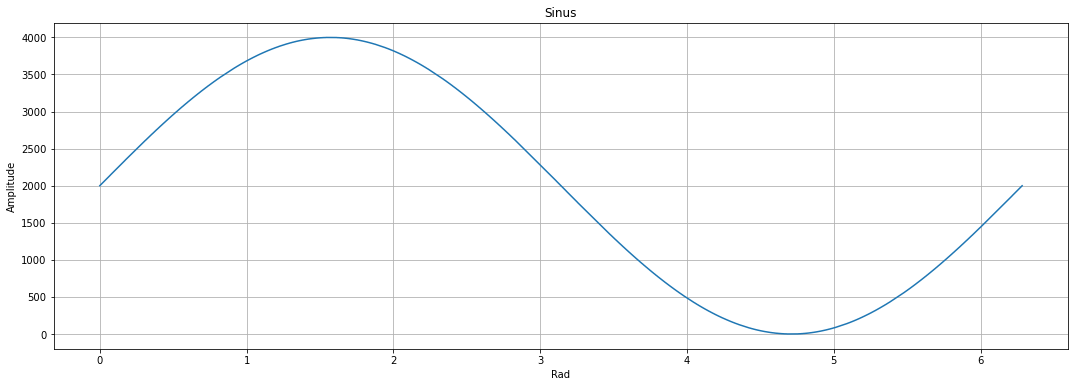

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import struct 

Bit = 12
N = np.power(2,Bit) # Anzahl an Abtastpunkte
ROM_data = open("Sin_ROM_file.coe", 'w')
a = 2000 # Aufloesung der Amplitude der Sinus-Funktion (Ab 140 annaehrend Glatt)

x = np.linspace(0,2*np.pi,num=N) # N X-Werte zwischen 0 und 2pi
y = a * np.sin(x) +2000 # Y-Werte fuer Sinus-Funktion
y_new = [] # Y-Werte auf ganze zahlen Runden
for a in y:
    y_new.append(int(a))


#-------Sinus-Plot mit 2^16 Punkte zwischen 0 und 2pi--------------------
plt.figure(figsize=(40, 6))
plt.subplot(1, 2, 1)
plt.plot(x,y_new)
#plt.plot(x,y)
plt.title('Sinus')
plt.xlabel('Rad')
plt.ylabel('Amplitude')
plt.grid(True)
#---------------------------------------------------------------------------

ROM_data.write("memory_initialization_radix=10;\n")
ROM_data.write("memory_initialization_vector=\n")
last = 0
print("Anzahl an Werten im ROM-File: " + str(len(y)))
for dat in y_new:
    last = last+1
    if((last) == len(y)):
        ROM_data.write(str(dat) + "; Daten")
    else:
        ROM_data.write(str(dat) + ",\n")
